In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# 1. Take A Quick Look

In [2]:
training = pd.read_csv('./training.csv')
test = pd.read_csv('./test.csv')

# first look at data 
training.head(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


In [3]:
# statistics of the numerial features
training.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


0    0.877012
1    0.122988
Name: IsBadBuy, dtype: float64


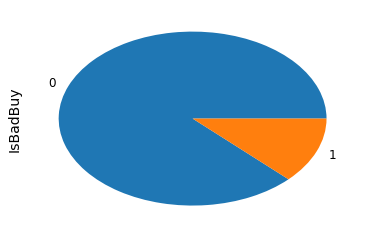

In [4]:
# look at the distribution of our interest: isbadbuy
prop_buy = training['IsBadBuy'].value_counts()/len(training)
print(prop_buy)
prop_buy.plot(kind = 'pie')

In [5]:
# NA statistics
training.isnull().sum().div(len(training), axis = 0)*100

RefId                                 0.000000
IsBadBuy                              0.000000
PurchDate                             0.000000
Auction                               0.000000
VehYear                               0.000000
VehicleAge                            0.000000
Make                                  0.000000
Model                                 0.000000
Trim                                  3.233630
SubModel                              0.010961
Color                                 0.010961
Transmission                          0.012332
WheelTypeID                           4.342107
WheelType                             4.348958
VehOdo                                0.000000
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
MMRAcquisitionAuctionAveragePrice     0.024663
MMRAcquisitionAuctionCleanPrice       0.024663
MMRAcquisitionRetailAveragePrice      0.024663
MMRAcquisiton

Double check whether the missing values are from goodbuy or badbuy.

In [6]:
training.loc[training.PRIMEUNIT.isnull()]['IsBadBuy'].value_counts()/len(training)*100

0    83.198827
1    12.116520
Name: IsBadBuy, dtype: float64

In [7]:
training.loc[training.AUCGUART.isnull()]['IsBadBuy'].value_counts()/len(training)*100

0    83.198827
1    12.116520
Name: IsBadBuy, dtype: float64

From the list above, we can see that these two features'PRIMEUNIT' and 'AUCGUART' have around 95% missing data, which limits their uses. 

PRIMEUNIT: Identifies if the vehicle would have a higher demand than a standard purchase

AUCGUART: The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)

Also, there is no preference of missing values from good or bad buy. (83.2% vs 87.7%)

In [8]:
drop_list = ['PRIMEUNIT', 'AUCGUART']

## Numerical Features

In [9]:
numerical_features = training.select_dtypes(include = ['float64', 'int64', 'bool']).columns.values
categorical_features = training.select_dtypes(include = ['object']).columns.values

In [10]:
numerical_features

array(['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID',
       'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'], dtype=object)

## Text and Categorical Features

In [11]:
categorical_features

array(['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel',
       'Color', 'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST'], dtype=object)

In [12]:
# before we drop and modify the traning and test datasets, make copies of them
df_training = training.copy()
df_test = test.copy()

# 2. Drop Features

Through the missing value statistics, we drop 'PRIMEUNIT', 'AUCGUART'. Let's discuss the rest features and give justification why I decide to drop them.

1. 'RefID': it is used to assigned to vehicles and has no information for us to predict auction.
2. 'Model', 'Trim' and 'SubModel': 'SubModel' almost contains everything we want to define the configuration of a car. Since we have already 'Size' features, I plan not to define the type of car like SUV. The engine features are extracted from this variable like 4.3L: float64
3. 'WheelTypeID': it has no information for us to predict auction.
4. 'KickDate': not shown on the datasets
5. 'BYRNO': it has no information for us to predict auction.
6. 'VNZIP': drop it at this moment and use 'VNST'. Maybe we can combine this geographical feature with the economic information like medium incomes or car sales in the future. I would love to plot it in Tableau to see the geographical distribution. I will leave it later if I have time.

In [13]:
drop_list = ['PRIMEUNIT', 'AUCGUART', 'RefId', 'Model', 'Trim', 
             'SubModel', 'WheelType', 'BYRNO', 'VNZIP1']

In [14]:
for df in [df_training, df_test]:
    df.PurchDate = pd.to_datetime(df.PurchDate, format=r'%m/%d/%Y').astype(np.int64)//10**15
    
for df in [df_training, df_test]:
    # add engine feature
    df['Engine'] = df.SubModel.str.extract('\s+(\d+.\d+)L', expand = True).astype('float64')

# now we can start the drop list
for df in [df_training, df_test]:
    df.drop(drop_list, axis=1, inplace=True)

In [15]:
# now check the numerical_features and categorical_features in the current model
numerical_features = df_training.select_dtypes(include = ['float64', 'int64', 'bool']).columns.values
categorical_features = df_training.select_dtypes(include = ['object']).columns.values
print(numerical_features)
print(categorical_features)

['IsBadBuy' 'PurchDate' 'VehYear' 'VehicleAge' 'WheelTypeID' 'VehOdo'
 'MMRAcquisitionAuctionAveragePrice' 'MMRAcquisitionAuctionCleanPrice'
 'MMRAcquisitionRetailAveragePrice' 'MMRAcquisitonRetailCleanPrice'
 'MMRCurrentAuctionAveragePrice' 'MMRCurrentAuctionCleanPrice'
 'MMRCurrentRetailAveragePrice' 'MMRCurrentRetailCleanPrice' 'VehBCost'
 'IsOnlineSale' 'WarrantyCost' 'Engine']
['Auction' 'Make' 'Color' 'Transmission' 'Nationality' 'Size'
 'TopThreeAmericanName' 'VNST']


Saving figure attribute_histogram_plots


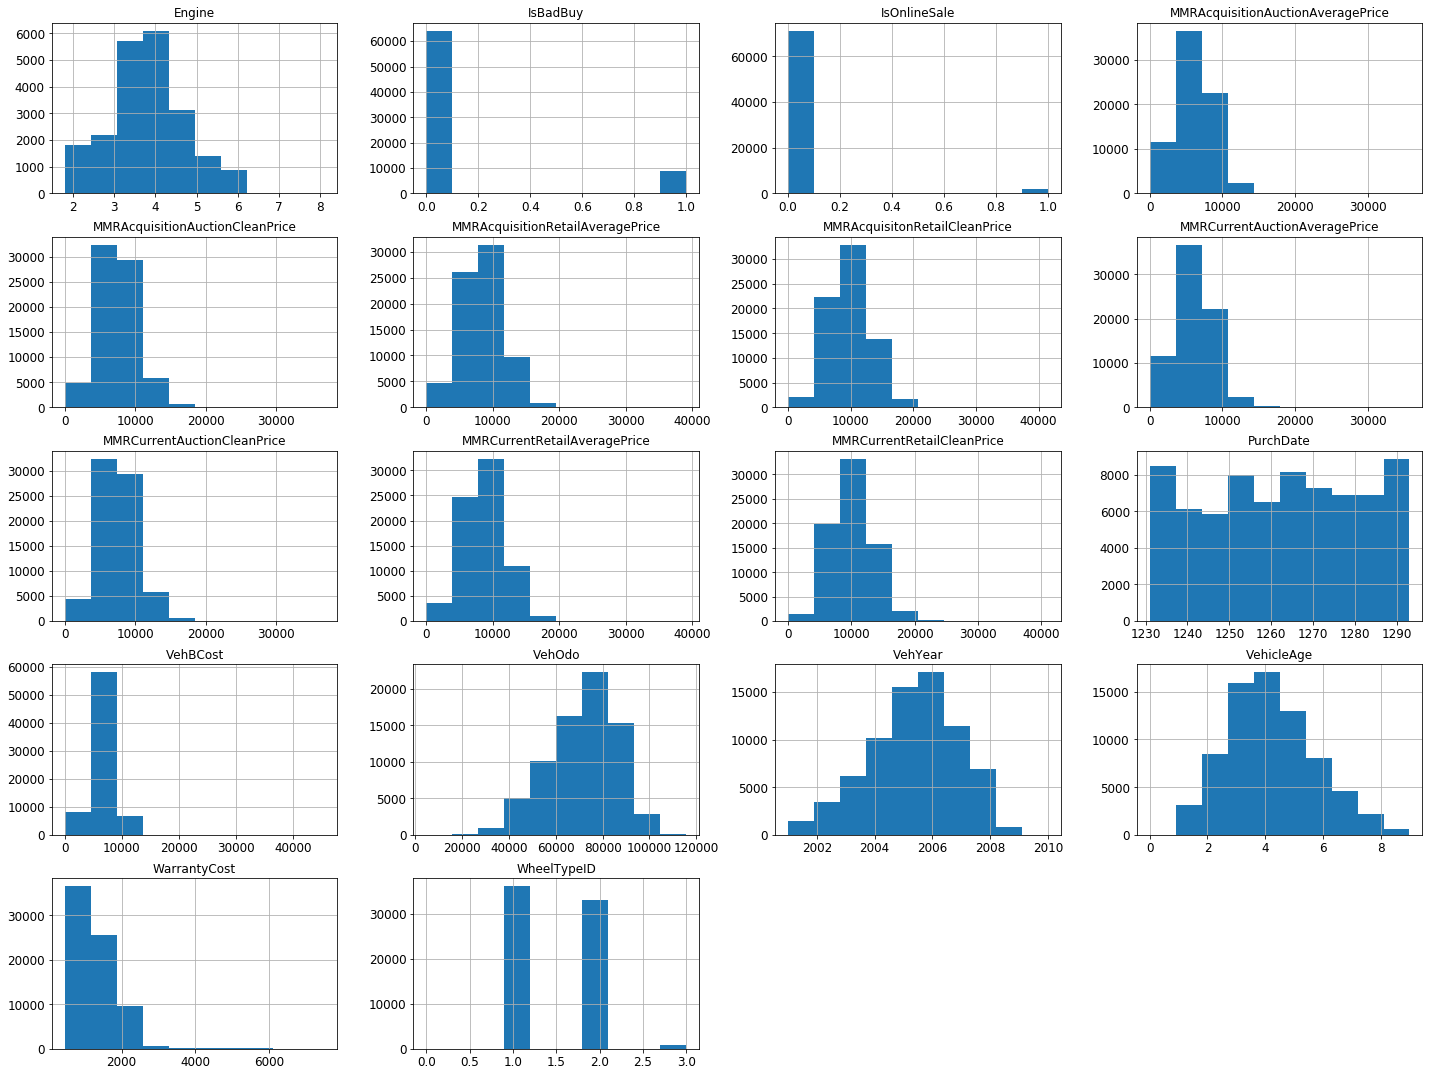

In [16]:
df_training.hist(bins=10, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.tight_layout()
plt.show()

Saving figure covariance matrix heatmap


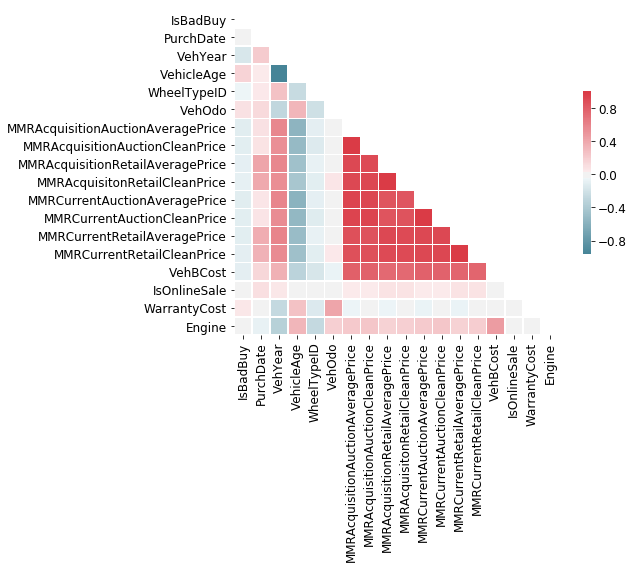

In [17]:
corr = df_training[numerical_features].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
save_fig("covariance matrix heatmap")

In [18]:
corr["IsBadBuy"].sort_values(ascending=False)

IsBadBuy                             1.000000
VehicleAge                           0.167164
VehOdo                               0.082560
WarrantyCost                         0.052319
Engine                               0.027818
PurchDate                            0.015088
IsOnlineSale                        -0.003697
WheelTypeID                         -0.044620
MMRAcquisitonRetailCleanPrice       -0.083665
MMRAcquisitionRetailAveragePrice    -0.087418
VehBCost                            -0.099911
MMRCurrentRetailCleanPrice          -0.100245
MMRAcquisitionAuctionCleanPrice     -0.102954
MMRCurrentRetailAveragePrice        -0.103914
MMRCurrentAuctionCleanPrice         -0.104020
MMRCurrentAuctionAveragePrice       -0.109112
MMRAcquisitionAuctionAveragePrice   -0.109252
VehYear                             -0.158886
Name: IsBadBuy, dtype: float64

In [19]:
y = df_training['IsBadBuy'].copy()
df_training.drop(['IsBadBuy'], axis=1, inplace = True)

numerical_features = df_training.select_dtypes(include = ['float64', 'int64', 'bool']).columns.values
# not choose 'IsBadBuy'
categorical_features = df_training.select_dtypes(include = ['object']).columns.values

In [20]:
for feature in categorical_features:
    print('{0}, Miss Value {1}'.format(feature, df_training[feature].isnull().sum()))

Auction, Miss Value 0
Make, Miss Value 0
Color, Miss Value 8
Transmission, Miss Value 9
Nationality, Miss Value 5
Size, Miss Value 5
TopThreeAmericanName, Miss Value 5
VNST, Miss Value 0


The missing values in Color are replaced with the most frequent category i.e. 'SILVER'.

The missing values in Transmission are replaced with the most frequent category i.e. 'AUTO'.

The missing values in Nationality are replaced with the most frequent category i.e. 'AMERICAN'.

The missing values in Size are replaced with the most frequent category i.e. 'MEDIUM'.

The missing values in TopThreeAmericanName are replaced with the most frequent category i.e. 'GM'.


In [21]:
dict = {'Color': 'SILVER',
        'Transmission': 'AUTO',
        'Nationality': 'AMERICAN',
        'Size': 'MEDIUM',
        'TopThreeAmericanName': 'GM'}

for df in [df_training, df_test]:
    for feature in dict.keys():
        df[feature] = df[feature].str.upper()
        df[feature] = df[feature].fillna(dict[feature])

print(df_training.shape)
print(df_test.shape)
print(y.shape)

(72983, 25)
(48707, 25)
(72983,)


For numerical values: fill missing values with median and scale them.

For categorical values: use label-encoder method.

In [22]:
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
names = df_training.columns.values
def pipe(df):
    df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)
    temp = Imputer(strategy = 'median').fit_transform(df)
    temp = pd.DataFrame(temp)
    temp = StandardScaler().fit_transform(temp)
    return pd.DataFrame(temp, columns = names)

df_training = pipe(df_training)
df_test = pipe(df_test)

In [23]:
df_training[:10]

,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,VehOdo,Nationality,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,Engine
0,-0.142534,-1.57822,0.379467,-0.687212,1.038432,0.785203,-0.191278,-0.909824,1.203528,1.862232,...,1.107445,0.543047,0.433383,0.914874,0.685359,-0.926527,0.208767,-0.161045,-0.273162,-0.025183
1,-0.142534,-1.57822,-0.775775,0.480877,-0.492309,1.174152,-0.191278,-0.909824,1.515419,-0.430874,...,0.803783,0.545105,0.683343,0.842566,0.801009,-0.926527,0.491599,-0.161045,-0.373355,1.843284
2,-0.142534,-1.57822,-0.198154,-0.103168,-0.492309,-0.187168,-0.191278,1.014360,0.158244,-0.430874,...,-0.411749,-0.863122,-0.683974,-0.528378,-0.436926,-0.926527,-1.035693,-0.161045,0.187727,-0.025183
3,-0.142534,-1.57822,-0.775775,0.480877,-0.492309,0.979678,-0.191278,-0.909824,-0.403531,-0.430874,...,-1.229094,-1.765030,-1.769993,-1.426885,-1.400874,-0.926527,-1.488224,-0.161045,-1.079718,-0.025183
4,-0.142534,-1.57822,-0.198154,-0.103168,-0.364747,0.979678,5.227993,1.014360,-0.146308,-0.430874,...,-0.337901,-1.187496,-1.121590,-0.660349,-0.676399,-0.926527,-1.544791,-0.161045,-0.428461,-0.025183
5,-0.142534,-1.57822,-0.775775,0.480877,1.421117,1.174152,-0.191278,1.014360,0.655335,1.862232,...,-0.376302,-0.585675,-0.583244,-0.203152,-0.210168,-0.926527,-0.639729,-0.161045,-1.139834,-0.025183
6,-0.142534,-1.57822,-0.775775,0.480877,0.655747,-1.354013,-0.191278,1.014360,-0.423354,1.862232,...,-0.400228,-1.297404,-1.221947,-0.825394,-0.466898,-0.926527,-1.431658,-0.161045,-1.241697,-0.025183
7,-0.142534,-1.57822,-0.198154,-0.103168,-0.364747,1.174152,-0.191278,1.014360,-0.390635,-0.430874,...,-0.633292,-0.995671,-1.049214,-0.594526,-0.576190,-0.926527,-1.261959,-0.161045,-0.754090,-0.025183
8,-0.142534,-1.57822,0.957087,-1.271257,0.655747,-1.354013,-0.191278,1.014360,-1.480161,1.862232,...,0.228363,0.117409,-0.007218,0.279337,0.191578,-0.926527,-0.639729,-0.161045,-1.326861,-0.025183
9,-0.142534,-1.57822,0.957087,-1.271257,-0.364747,0.785203,-0.191278,-0.909824,0.917222,-0.430874,...,1.123987,1.249424,1.342192,1.233616,1.422852,-0.926527,0.548165,-0.161045,0.595180,-0.025183


In [24]:
df_test[:10]

,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,VehOdo,Nationality,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,Engine
0,-0.271831,-1.384187,-0.191584,-0.126587,1.878319,0.987629,-0.189823,-0.859108,0.952571,-0.441299,...,-0.750903,-0.498067,-0.448486,-0.083379,-0.135245,-0.762308,-0.148471,-0.150015,1.423037,-0.064622
1,-0.271831,-1.384187,-0.191584,-0.126587,-0.769951,0.987629,-0.189823,-0.859108,-0.669761,-0.441299,...,-0.976153,-0.605340,-0.624296,-0.408792,-0.274262,-0.762308,-0.262301,-0.150015,-0.266514,-0.064622
2,-0.271831,-1.384187,0.386289,-0.713180,-0.491186,0.987629,-0.189823,-0.859108,-0.158296,-0.441299,...,1.387625,1.968372,1.785533,2.134990,1.925623,-0.762308,1.672798,-0.150015,-0.108017,1.996096
3,-0.271831,-1.384187,-1.925206,1.633191,2.017701,-0.789870,-0.189823,-0.859108,1.125959,-0.441299,...,-1.664993,-1.313750,-1.409283,-1.009580,-1.157752,-0.762308,-1.485966,-0.150015,1.065192,-0.064622
4,-0.271831,-1.384187,0.964163,-1.299772,0.066345,-1.145370,-0.189823,-0.859108,0.128084,1.848133,...,-0.764888,-0.453508,-0.388017,-0.947768,-0.867523,-0.762308,-1.514423,-0.150015,-0.590045,-0.064622
5,-0.271831,-1.384187,0.386289,-0.713180,-0.491186,-0.612120,-0.189823,-0.859108,1.344764,-0.441299,...,-1.095770,-0.805031,-0.849378,-0.554002,-0.638267,-0.762308,-1.457509,-0.150015,0.097867,-0.064622
6,-0.271831,-1.384187,0.386289,-0.713180,-0.351803,-0.967620,-0.189823,-0.859108,0.019026,-0.441299,...,0.558339,1.094515,1.137910,1.591762,1.357969,-0.762308,0.989822,-0.150015,-0.206056,0.553593
7,-0.271831,-1.384187,-1.347332,1.046598,-0.630568,-1.145370,5.268079,-0.859108,0.233621,-0.441299,...,-1.273410,-0.957276,-1.020709,-0.621374,-0.750456,-0.762308,-1.514423,-0.150015,0.666497,-0.064622
8,-0.271831,-1.384187,-0.191584,-0.126587,-0.769951,0.987629,-0.189823,-0.859108,-1.940970,-0.441299,...,-1.091902,-0.768311,-0.730305,-0.457850,-0.514798,-0.762308,-0.489959,-0.150015,-0.844949,-0.064622
9,-0.271831,-1.384187,0.386289,-0.713180,-0.630568,1.165379,-0.189823,-0.859108,0.458017,-0.441299,...,0.790432,1.434073,1.663474,1.422678,1.618931,-0.762308,-0.034642,-0.150015,0.558654,0.141450


# 3. Modeling

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Is good or bad buy) with many features. 

Logistic Regression

KNN or k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree

Random Forrest

Perceptron

Artificial neural network

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(df_training, y, random_state = 24)

In [28]:
# simple model
models = {'LogisticRegression':LogisticRegression(),'SVC': SVC(), 
              'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 3),
              'GaussianNB': GaussianNB(), 'Perceptron': Perceptron(), 
              'LinearSVC': LinearSVC(), 'SGDClassifier': SGDClassifier(), 
              'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(n_estimators=100)}

for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy_ = accuracy_score(ypred,y_test)
    f1_ = f1_score(ypred,y_test)
    roc_ = roc_auc_score(ypred,y_test)
    print('%s classifier: accuracy = %.2f\%, f1 score = %.2f\%, roc = %.2f\%' %(name, accuracy_*100,
                                                                           f1_*100 ,roc_*100 ))

/home/wangruinju/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/wangruinju/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/wangruinju/anaco

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.